## 회귀 - 당뇨병

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential([
    Dense(24, input_dim=10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)                        # 회귀에서는 출력층에 활성화함수를 사용하지 않음
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                264       
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 525 (2.05 KB)
Trainable params: 525 (2.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# 회귀 실행시에는 metrics 사용하지 않음
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [17]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 28730.3008 - val_loss: 30220.8125 - 533ms/epoch - 178ms/step
Epoch 2/1000
3/3 - 0s - loss: 28717.5664 - val_loss: 30209.3652 - 30ms/epoch - 10ms/step
Epoch 3/1000
3/3 - 0s - loss: 28706.5645 - val_loss: 30198.2188 - 31ms/epoch - 10ms/step
Epoch 4/1000
3/3 - 0s - loss: 28695.8164 - val_loss: 30187.1836 - 31ms/epoch - 10ms/step
Epoch 5/1000
3/3 - 0s - loss: 28685.1133 - val_loss: 30175.9648 - 33ms/epoch - 11ms/step
Epoch 6/1000
3/3 - 0s - loss: 28674.3008 - val_loss: 30164.5430 - 32ms/epoch - 11ms/step
Epoch 7/1000
3/3 - 0s - loss: 28663.2383 - val_loss: 30152.7715 - 31ms/epoch - 10ms/step
Epoch 8/1000
3/3 - 0s - loss: 28651.7773 - val_loss: 30140.5000 - 32ms/epoch - 11ms/step
Epoch 9/1000
3/3 - 0s - loss: 28639.9043 - val_loss: 30127.7773 - 32ms/epoch - 11ms/step
Epoch 10/1000
3/3 - 0s - loss: 28627.6035 - val_loss: 30114.4434 - 32ms/epoch - 11ms/step
Epoch 11/1000
3/3 - 0s - loss: 28614.7793 - val_loss: 30100.6270 - 32ms/epoch - 11ms/step
Epoch 12/1000
3/3

In [18]:
# 평가
pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, pred.flatten())

0.4959774403998991

In [20]:
import pandas as pd
df = pd.DataFrame({'y_test':y_test, 'pred':pred.flatten()})
df.head()

,y_test,pred
0,265.0,158.171570
1,261.0,234.689423
2,160.0,103.748024
3,249.0,204.873993
4,102.0,102.904243


- 학습과정 시각화

In [21]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

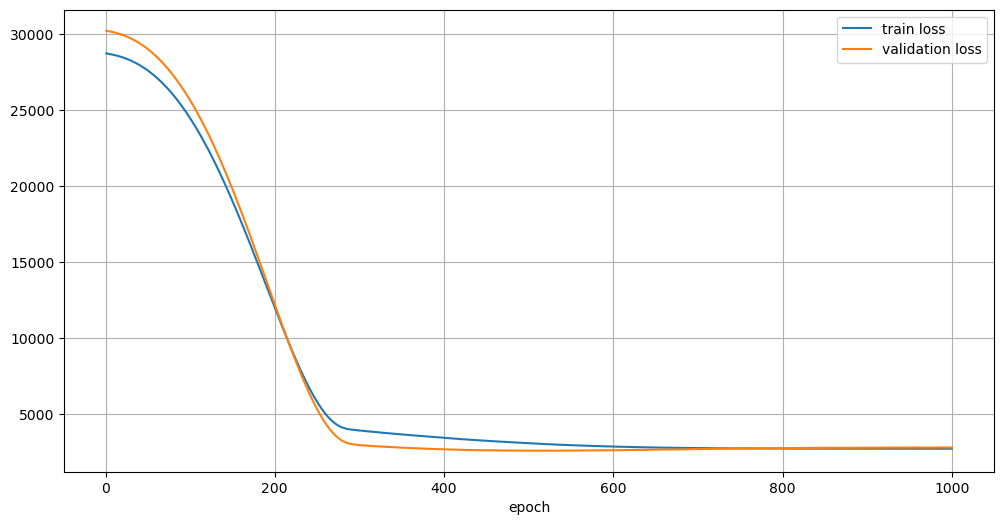

In [22]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()